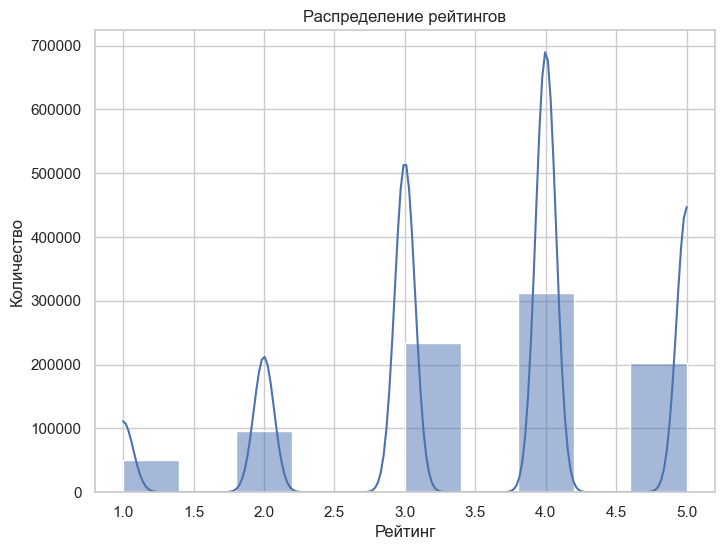

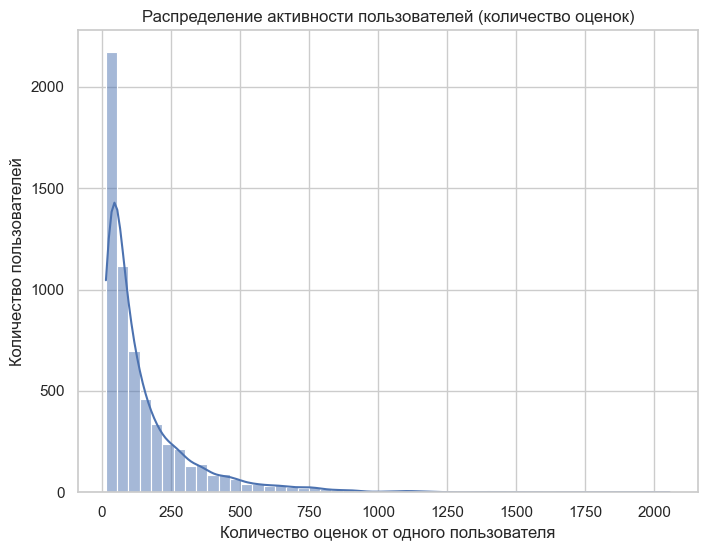

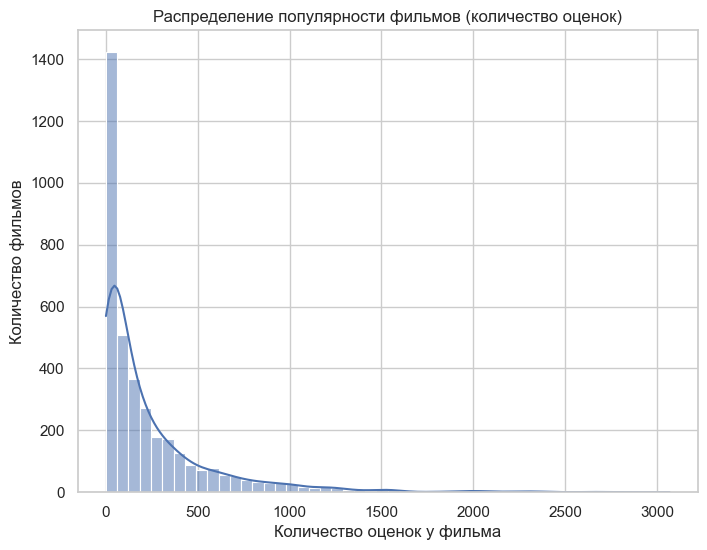

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Загрузка данных
events = pd.read_csv('data/events.csv')  # [user_id, item_id, rating, timestamp]

# Преобразуем столбец timestamp в формат datetime
events['timestamp'] = pd.to_datetime(events['timestamp'], unit='h')

# Настройки для визуализаций
sns.set(style="whitegrid")

# ------------------------------
# 1. Анализ распределения рейтингов
# ------------------------------

plt.figure(figsize=(8, 6))
sns.histplot(events['rating'], bins=10, kde=True)
plt.title('Распределение рейтингов')
plt.xlabel('Рейтинг')
plt.ylabel('Количество')
plt.show()

# ------------------------------
# 2. Анализ активности пользователей (сколько оценок поставил каждый пользователь)
# ------------------------------

user_activity = events.groupby('user_id')['rating'].count()

plt.figure(figsize=(8, 6))
sns.histplot(user_activity, bins=50, kde=True)
plt.title('Распределение активности пользователей (количество оценок)')
plt.xlabel('Количество оценок от одного пользователя')
plt.ylabel('Количество пользователей')
plt.show()

# ------------------------------
# 3. Популярность фильмов (сколько оценок получил каждый фильм)
# ------------------------------

movie_popularity = events.groupby('item_id')['rating'].count()

plt.figure(figsize=(8, 6))
sns.histplot(movie_popularity, bins=50, kde=True)
plt.title('Распределение популярности фильмов (количество оценок)')
plt.xlabel('Количество оценок у фильма')
plt.ylabel('Количество фильмов')
plt.show()

# # ------------------------------
# # 4. Временные паттерны (активность пользователей по времени)
# для нас это не актуально, потому что timestamp не понятно в каких единицах
# # ------------------------------

# plt.figure(figsize=(10, 6))
# events['hour'] = events['timestamp'].dt.hour
# sns.countplot(x='hour', data=events)
# plt.title('Активность пользователей по времени условных "суток"')
# plt.xlabel('Час дня')
# plt.ylabel('Количество оценок')
# plt.show()


## Фичи

In [2]:
import os 
data_path = 'data'

user_features = pd.read_csv(os.path.join(data_path,'user_features.csv')) # [user_id, gender, age]
events = pd.read_csv(os.path.join(data_path,'events.csv'))  
import pandas as pd

events_df = pd.read_csv('./data/events.csv')


item_features_df = pd.read_csv('./data/item_features.csv')


def split_data_by_user(df, test_size=3, val_size=3):
    """
    Функция разделения данных на обучающую, валидационную и тестовую выборки.
    
    :param df: DataFrame с данными
    :param test_size: размер тестового набора (по умолчанию 1)
    :param val_size: размер валидационного набора (по умолчанию 1)
    :return: три DataFrame: train_df, val_df, test_df
    """
    # Группируем данные по каждому пользователю
    grouped = df.groupby('user_id')
    
    # Список для хранения индексов каждой группы
    train_indices = []
    val_indices = []
    test_indices = []
    
    # Проходимся по каждой группе
    for _, group in grouped:
        # Сортируем группу по timestamp
        sorted_group = group.sort_values(by='timestamp', ascending=False)
        
        # Получаем индексы для каждой выборки
        test_idx = sorted_group.index[:test_size]
        val_idx = sorted_group.index[test_size:test_size + val_size]
        train_idx = sorted_group.index[test_size + val_size:]
        
        # Добавляем индексы в соответствующие списки
        train_indices.extend(train_idx)
        val_indices.extend(val_idx)
        test_indices.extend(test_idx)
    
    # Формируем DataFrames для каждой выборки
    train_df = df.loc[train_indices].copy()
    val_df = df.loc[val_indices].copy()
    test_df = df.loc[test_indices].copy()
    
    return train_df, val_df, test_df

# Пример использования функции
train_df, val_df, test_df = split_data_by_user(events_df)

print("Train shape:", train_df.shape)
print("Val shape:", val_df.shape)
print("Test shape:", test_df.shape)

Train shape: (857909, 4)
Val shape: (18120, 4)
Test shape: (18120, 4)


In [3]:
from feature_additions import *


user_features_from_train = get_user_features_from_train(train_df, item_features_df)
item_features_from_train = get_item_features_from_train(train_df, item_features_df)

# Присоединение признаков к тестовому набору данных
test_df_with_features = join_features_to_test(test_df, user_features_from_train, item_features_from_train)

# Итоговый тестовый датасет с признаками
test_df_with_features.head()

,user_id,item_id,rating,timestamp,user_avg_rating,user_num_ratings,user_avg_rating_genre_0,user_avg_rating_genre_1,user_avg_rating_genre_2,user_avg_rating_genre_3,...,user_avg_rating_genre_11,user_avg_rating_genre_12,user_avg_rating_genre_13,user_avg_rating_genre_14,user_avg_rating_genre_15,user_avg_rating_genre_16,user_avg_rating_genre_17,num_genres,movie_avg_rating,movie_num_ratings
0,0,3360,2,326,3.992883,281,0.327402,0.217082,0.092527,0.153025,...,0.064057,0.042705,0.192171,0.167260,0.217082,0.060498,0.014235,2,2.490196,306.0
1,0,2924,3,325,3.992883,281,0.327402,0.217082,0.092527,0.153025,...,0.064057,0.042705,0.192171,0.167260,0.217082,0.060498,0.014235,1,2.709302,172.0
2,0,3602,4,323,3.992883,281,0.327402,0.217082,0.092527,0.153025,...,0.064057,0.042705,0.192171,0.167260,0.217082,0.060498,0.014235,4,2.741379,406.0
3,1,584,4,286,3.666667,255,0.321569,0.125490,0.027451,0.035294,...,0.019608,0.035294,0.090196,0.231373,0.403922,0.050980,0.019608,3,3.778826,2333.0
4,1,2345,4,285,3.666667,255,0.321569,0.125490,0.027451,0.035294,...,0.019608,0.035294,0.090196,0.231373,0.403922,0.050980,0.019608,1,4.074747,495.0


In [4]:
test_df

,user_id,item_id,rating,timestamp
286,0,3360,2,326
285,0,2924,3,325
284,0,3602,4,323
547,1,584,4,286
546,1,2345,4,285
...,...,...,...,...
893945,6038,2151,1,731
893944,6038,3540,2,730
894148,6039,1177,4,227
894147,6039,241,4,226
